In [44]:
import pandas as pd
import numpy as np 
from numpy import random

In [45]:

#Alojamientos turísticos

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

alojamientos=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\alojamientos-turisticos-sample(ene2017)\alojamientos-turisticos-sample.csv",sep=",")
aloha=alojamientos.copy()

aloha.city=aloha['city'].apply(lambda x: str(x).lower())

aloha.iloc[0:3,:]




,apartment_id,url,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,26316169,https://www.airbnb.com/rooms/26316169,Olivia's Place,Olivia`s place es Piso reformado a nuevo pensa...,123008256,"Barrio tranquilo, hay un chino al lado que ven...",Este,NaN,36.72462,-4.35947,Entire home/apt,5,1.0,3.0,4.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,B...",80.0,2,30,True,0,0,0,167,11,2018-07-06,2019-08-25,96.0,10.0,10.0,10.0,10.0,8.0,9.0,Exempt,True,0.55,spain,malaga,2020-02-29
1,34672572,https://www.airbnb.com/rooms/34672572,1Bedroom apartment in Atocha - Wanda Metropoli...,Acogedor apartamento de 1 dormitorio y 1 baño ...,3256859,Este acogedor y amplio apartamento de dos dorm...,Cortes,Centro,40.41185,-3.69767,Entire home/apt,4,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",500.0,1,1125,True,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-10-16
2,32603220,https://www.airbnb.com/rooms/32603220,Modern apartment in a villa with pool,The fantastic outdoor area offering a view int...,107752533,La finca está ubicada entre Portocolom y Porto...,Felanitx,NaN,39.44821,3.24418,Entire home/apt,2,1.0,1.0,2.0,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",60.0,2,15,True,30,59,59,59,15,2019-04-07,2019-09-09,96.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,True,1.17,spain,mallorca,2020-04-23


In [100]:
#Ranking de ciudades por caracteristicas 

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')


rk_ciu= pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\nomad_cities.csv",sep="\t")
rk_ciu.place=rk_ciu['place'].apply(lambda x: str(x).lower()).copy() #Me aseguro de que todos los nombre de ciudades estan en minusculas en la columna 'place' 
rk_ciu.place=rk_ciu['place'].apply(lambda x : 'sevilla' if x=='seville' else x).copy() #En uno de los datasets aparece el nombre de sevilla en inglés , lo cambio 
rk_cminusc=rk_ciu.copy() #Hago una copia de rk_ciudad , y la emplearé para hace el merge con la otra tabla para así tener el ranking pero solo de ciudades de España
#print(rk_cminusc)

#(???!!!)Ahora convierto estas columnas de str a float -->algunos de los valores en tu serie contienen la cadena 'DotMap()' en lugar de un valor numérico válido.
#rk_cminusc['freedom_score']=rk_cminusc['freedom_score'].apply(lambda x: float(int(str(x)))) !!!!!!!!!PREGUNTAR POR QUE NO FUNCIONA LA CONVERSION DE STR A FLOAT 
#rk_cminusc['freedom_score']=rk_cminusc['freedom_score'].astype(float) !!!!!!!!!!TAMBIEN DA FALLO NO CONVIERTE EN FLOAT pq algunos de los valores en la serie contienen la cadena 'DotMap()' en lugar de un valor numérico válido.
#df['mi_serie'] = pd.to_numeric(df['mi_serie'], errors='coerce')-->Esta solucion tampoco buena pq aparece el 'DotMap()'

rk_cminusc['freedom_score']=rk_cminusc['freedom_score'].apply(lambda x:float(x) if not'DotMap()'in x else x) #Me toca hacer la conversion de str-->float así pq la serie contienen la cadena 'DotMap()'
                                                                                                             #Cuando aplico elbucle for de abajo(*1) no me lo coge y no entiendo el pq
rk_cminusc['peace_score']=rk_cminusc['peace_score'].apply(lambda x:float(x) if not'DotMap()'in x else x)
#print(rk_cminusc)


#Esto lo hago para escalar los datos proporcionados y pasarlos a una escala '1-10' en vez de '0.1-1'

indices_columna = rk_cminusc.columns
mult_xdiez=['female_friendly','free_wifi_available', 'freedom_score', 
            'friendly_to_foreigners','leisure', 'lgbt_friendly', 
            'life_score','nightlife', 'nomadScore', 'nomad_score', 
            'peace_score','places_to_work','racism', 'safety','weed']  #-->lista de terminos a multiplicar por 10
def por_diez():
#    for i in indices_columna:  # (*1)Este es el bucle 'for' que decía antes que no sabía porque no funcionaba 
#         if i==('freedom_score') or ('peace_score'):
#              rk_cminusc[i]=rk_cminusc[i].apply(lambda x:float(x) if not'DotMap()'in x else x)
    for i in indices_columna:
         if i in mult_xdiez:
             rk_cminusc[i]=rk_cminusc[i]*10
por_diez()

#Esta es la matriz que me queda 
print(rk_cminusc)

#rk_cminusc
#rk_cminusc#['place']
#rk_cminusc[rk_cminusc['place']=='madrid']

     Unnamed: 0  coffee_in_cafe  cost_beer  cost_coworking  cost_expat  \
0             0            1.73       1.73          152.41        1273   
1             1            0.85       0.85           98.88         780   
2             2            1.99       1.99          159.13        1653   
3             3            1.88       1.88           47.01        1640   
4             4            5.00       5.00          200.00        3309   
..          ...             ...        ...             ...         ...   
776         776            4.00       4.00           28.58         332   
777         777            2.00       2.00          183.00        1453   
778         778            1.60       1.60           32.01         760   
779         779            5.00       5.00          360.00        1441   
780         780            0.00       0.00          182.69        3749   

     cost_nomad  female_friendly       fragile_states_index  \
0          1364             10.0                

In [84]:
prueba=np.random.randint(1,25,9)
pruebat=prueba.reshape(3,3)
prueba=pd.DataFrame(pruebat,columns=['casa','telefono','luna'])
prueba['luna']=prueba['luna']*10
prueba

,casa,telefono,luna
0,13,20,110
1,9,2,80
2,14,19,200


In [85]:
df_ley=pd.DataFrame({'items':rk_ciu.columns})
df_ley.head(3) #df con la leyenda del significado de los valores columna 


,items
0,Unnamed: 0
1,coffee_in_cafe
2,cost_beer


In [86]:
rk_cminusc

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.73,1.73,152.41,1273,1364,10.0,52.7,4.0,6.0,6.0,31,47.497912,8.0,2.7,8.6,19.040235,10.0,10.0,10.0,8.0,budapest,10.0,28.17,4.0,6.0,0
1,1,0.85,0.85,98.88,780,777,8.0,78.8,6.0,2.0,6.0,14,18.787747,6.2,6.0,7.5,98.993128,4.0,9.5,9.5,4.0,chiang mai,8.0,44.53,4.0,8.0,0
2,2,1.99,1.99,159.13,1653,1639,10.0,40.8,6.0,8.0,8.0,15,50.075538,10.0,6.0,8.3,14.437800,10.0,9.4,9.4,8.0,prague,10.0,16.66,4.2,8.0,10
3,3,1.88,1.88,47.01,1640,1545,10.0,DotMap(__next__=DotMap()),10.0,6.0,8.0,16,25.091075,10.0,8.0,9.3,121.559834,6.0,9.4,9.4,DotMap(__next__=DotMap())DotMap(__next__=DotMa...,taipei,10.0,24.37,0.0,10.0,0
4,4,5.00,5.00,200.00,3309,3028,8.0,34,6.0,6.0,8.0,118,30.267153,10.0,6.0,9.5,-97.743061,10.0,9.4,9.4,8.0,austin,10.0,22.49,8.0,7.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,776,4.00,4.00,28.58,332,2637,2.0,101.7,4.0,2.0,4.0,2,29.389036,2.0,2.0,1.1,71.635921,2.0,1.8,1.8,2.0,bahawalpur,4.0,48.52,2.0,2.0,0
777,777,2.00,2.00,183.00,1453,2980,2.0,104.7,4.0,2.0,4.0,3,33.325000,2.0,2.0,0.9,44.422000,2.0,1.7,1.7,2.0,baghdad,4.0,54.35,6.0,2.0,0
778,778,1.60,1.60,32.01,760,1099,4.0,80.2,6.0,2.0,10.0,4,3.420556,6.0,4.0,3.6,-76.522222,10.0,1.6,1.6,4.0,cali,4.0,44.11,4.0,2.0,10
779,779,5.00,5.00,360.00,1441,5009,2.0,93.9,2.0,2.0,2.0,1,39.019400,2.0,2.0,1.4,125.738100,4.0,1.5,1.5,2.0,pyongyang,2.0,83.76,0.0,2.0,0


In [104]:
matrix=pd.merge(left=aloha,right=rk_cminusc,how='left',left_on='city',right_on='place') #Union de tablas
#print(matrix)
#matrix
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

#Elimino los campos que menos no presentan informacion numérica para la generacion de la matriz de Pearson #Me quito tambien las columnas fecha pq despues para Pearson dan Problemas
comodin=matrix.drop(columns=['url','name','description','neighborhood_overview','neighbourhood_name','neighbourhood_district',
                        'room_type','amenities_list','has_availability','license', 'is_instant_bookable','reviews_per_month', 
                        'country','first_review_date' ,'last_review_date','insert_date','place'],inplace=False)
matrix_rev=comodin.copy()############-->Es aquí donde deberia cmabiar la escala de los valores  de la tablade rk calidad cuidades


#poblaciones.drop(columns=['Municipios'],inplace=False)
#matrix_rload=matrix_rev.dropna(inplace=False) #Con matrix_rload quito todos los valores NaN que hayan surgido de la union de tablas
                                              #Al hacer esto elimino todos los datos de Disponibilidad a 1dia/sem/mes y estos NO SE HAN REGISTRADO en SEVILLA
                                              #Por lo tanto corro el riesgo de perder mucha informacion.Estrategia -->NO echar abajo la informacion de Sevilla y seguir adelante 
                                              #porque la informacion contenida en esas columna no parece muy relevante
                                              #Esto me obliga a que la tabla de trabajo para obtener las tablas de correlacion sea la de matrix_rev y luego si lo considero 
                                              #ya desecharé esas columnas si veo que no me revelan nada en la matriz de correlaciom 
# SE SOLVENTA EL PROBLEMA CON LOS NaN PORQUE DESCUBRO QUE SE DEBE A UNA MALA CONCATENACION DE TABLAS SEVILLE/SEVILLA 

#Se hace un flitro de las cinco ciudades mas destacadas y se deja todo preparado para una matriz de correlacion 
#Al final sacaríamos 5 matrices de correlacion ('madrid','barcelona','valencia','sevilla','girona','malaga','menorca','mallorca') 
#que nos darían una imagen de como son las ciudades preferidas de españa 
#Luego tendríamos que preguntarnos si es más adecuado tener una campervan ...o si nos sale más a cuenta en determinados momentos del año

ciudades=['madrid','barcelona','valencia','sevilla','girona','malaga','menorca','mallorca']
ciu_esp=matrix_rev[matrix_rev['city'].apply(lambda x: x in ciudades)] #dataset con las ciudades más atractivas para vivir a nivel turístico

#TOP 5 CIUDADES 
#VALENCIA
#print(matrix_rev['weed'])--> Este valor esta en la tabla de calidad de las ciudades para nomadas digitales
ciu_esp_val=matrix_rev[matrix_rev['city']=='valencia'].copy()

ciu_esp_val.drop(columns=['city'],inplace=True)
ciu_esp_val=ciu_esp_val.astype(float).copy()  #Aquí ya convierto todos los valores de la tabla a numero real para poder hace bien la matriz de correlacion 
ciu_esp_val=ciu_esp_val.dropna().copy() #Aqui elimino todos los NaN que hay en la tabla resultante
print(ciu_esp_val) #Aqui miro la tabla definitiva que paso para hacer pearson 
print(ciu_esp_val.dtypes)#aqui verifico que le he pasado todos los valores como float 


# Verificar valores faltantes en cada columna
#missing_values = ciu_esp_val.isna().sum()

# Mostrar la cantidad de valores faltantes por columna
#print(missing_values)

#BARCELONA
ciu_esp_bar=matrix_rev[matrix_rev['city']=='barcelona'].copy()
ciu_esp_bar.drop(columns=['city'],inplace=True)
ciu_esp_bar=ciu_esp_bar.astype(float).copy()
ciu_esp_bar=ciu_esp_bar.dropna().copy()


#MADRID
ciu_esp_mad=matrix_rev[matrix_rev['city']=='madrid'].copy()
ciu_esp_mad.drop(columns=['city'],inplace=True)
ciu_esp_mad=ciu_esp_mad.astype(float).copy()
ciu_esp_mad=ciu_esp_mad.dropna().copy()


#MALAGA
ciu_esp_mlg=matrix_rev[matrix_rev['city']=='malaga'].copy()
ciu_esp_mlg.drop(columns=['city'],inplace=True)
ciu_esp_mlg=ciu_esp_mlg.astype(float).copy()
ciu_esp_mlg=ciu_esp_mlg.dropna().copy()


#SEVILLA
ciu_esp_sev=matrix_rev[matrix_rev['city']=='sevilla'].copy()
ciu_esp_sev.drop(columns=['city'],inplace=True)
ciu_esp_sev=ciu_esp_sev.astype(float).copy()
ciu_esp_sev=ciu_esp_sev.dropna().copy()
ciu_esp_sev.head()



      apartment_id      host_id  latitude_x  longitude_x  accommodates  \
14      19477863.0   17212283.0    39.45853     -0.36059           4.0   
22      16528340.0   44358228.0    39.45953     -0.37118          16.0   
57      15088477.0   10268729.0    39.47264     -0.38766           1.0   
66        671096.0    3400551.0    39.46206     -0.37578           1.0   
85        853840.0    2361433.0    39.47385     -0.37554           4.0   
...            ...          ...         ...          ...           ...   
9942    26213739.0  197004881.0    39.48432     -0.36149           1.0   
9947     6986017.0   15814399.0    39.47251     -0.34435           7.0   
9948    17697449.0   67926892.0    39.47364     -0.36049           4.0   
9955    26986075.0  203029732.0    39.45700     -0.36178           6.0   
9982    33699046.0  222218769.0    39.47337     -0.35503           2.0   

      bathrooms  bedrooms  beds  price  minimum_nights  maximum_nights  \
14          1.0       2.0   3.0   90.

,apartment_id,host_id,latitude_x,longitude_x,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude_y,leisure,lgbt_friendly,life_score,longitude_y,nightlife,nomadScore,nomad_score,peace_score,places_to_work,press_freedom_index,racism,safety,weed
30,13500588.0,51048225.0,37.390360,-5.991920,4.0,1.0,1.0,2.0,58.0,2.0,1125.0,10.0,40.0,70.0,345.0,49.0,90.0,9.0,9.0,10.0,10.0,10.0,9.0,37.0,3.23,3.23,193.56,1781.0,2307.0,8.0,39.8,6.0,8.0,6.0,29.0,37.389092,6.0,8.0,8.6,-5.984459,4.5,8.3,8.3,8.0,8.0,19.92,4.0,10.0,10.0
46,23120468.0,171800364.0,37.390202,-5.990081,5.0,1.0,2.0,3.0,90.0,2.0,200.0,7.0,21.0,32.0,122.0,15.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,37.0,3.23,3.23,193.56,1781.0,2307.0,8.0,39.8,6.0,8.0,6.0,29.0,37.389092,6.0,8.0,8.6,-5.984459,4.5,8.3,8.3,8.0,8.0,19.92,4.0,10.0,10.0
63,11899122.0,3767640.0,37.400120,-5.986710,4.0,1.0,1.0,2.0,54.0,1.0,60.0,9.0,39.0,69.0,69.0,35.0,92.0,10.0,9.0,10.0,10.0,9.0,10.0,37.0,3.23,3.23,193.56,1781.0,2307.0,8.0,39.8,6.0,8.0,6.0,29.0,37.389092,6.0,8.0,8.6,-5.984459,4.5,8.3,8.3,8.0,8.0,19.92,4.0,10.0,10.0
125,16968124.0,113498910.0,37.381070,-5.999350,4.0,1.0,2.0,4.0,70.0,3.0,20.0,15.0,32.0,34.0,34.0,82.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,37.0,3.23,3.23,193.56,1781.0,2307.0,8.0,39.8,6.0,8.0,6.0,29.0,37.389092,6.0,8.0,8.6,-5.984459,4.5,8.3,8.3,8.0,8.0,19.92,4.0,10.0,10.0
130,895749.0,4774026.0,37.397392,-5.989001,1.0,1.0,1.0,1.0,19.0,3.0,1125.0,0.0,0.0,0.0,139.0,74.0,92.0,10.0,9.0,10.0,10.0,9.0,9.0,37.0,3.23,3.23,193.56,1781.0,2307.0,8.0,39.8,6.0,8.0,6.0,29.0,37.389092,6.0,8.0,8.6,-5.984459,4.5,8.3,8.3,8.0,8.0,19.92,4.0,10.0,10.0


In [102]:
# Importamos todos los paquetes que vayamos a necesitar
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
#pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

#import warnings
#warnings.filterwarnings("ignore")
#import sklearn
#sklearn.__version__

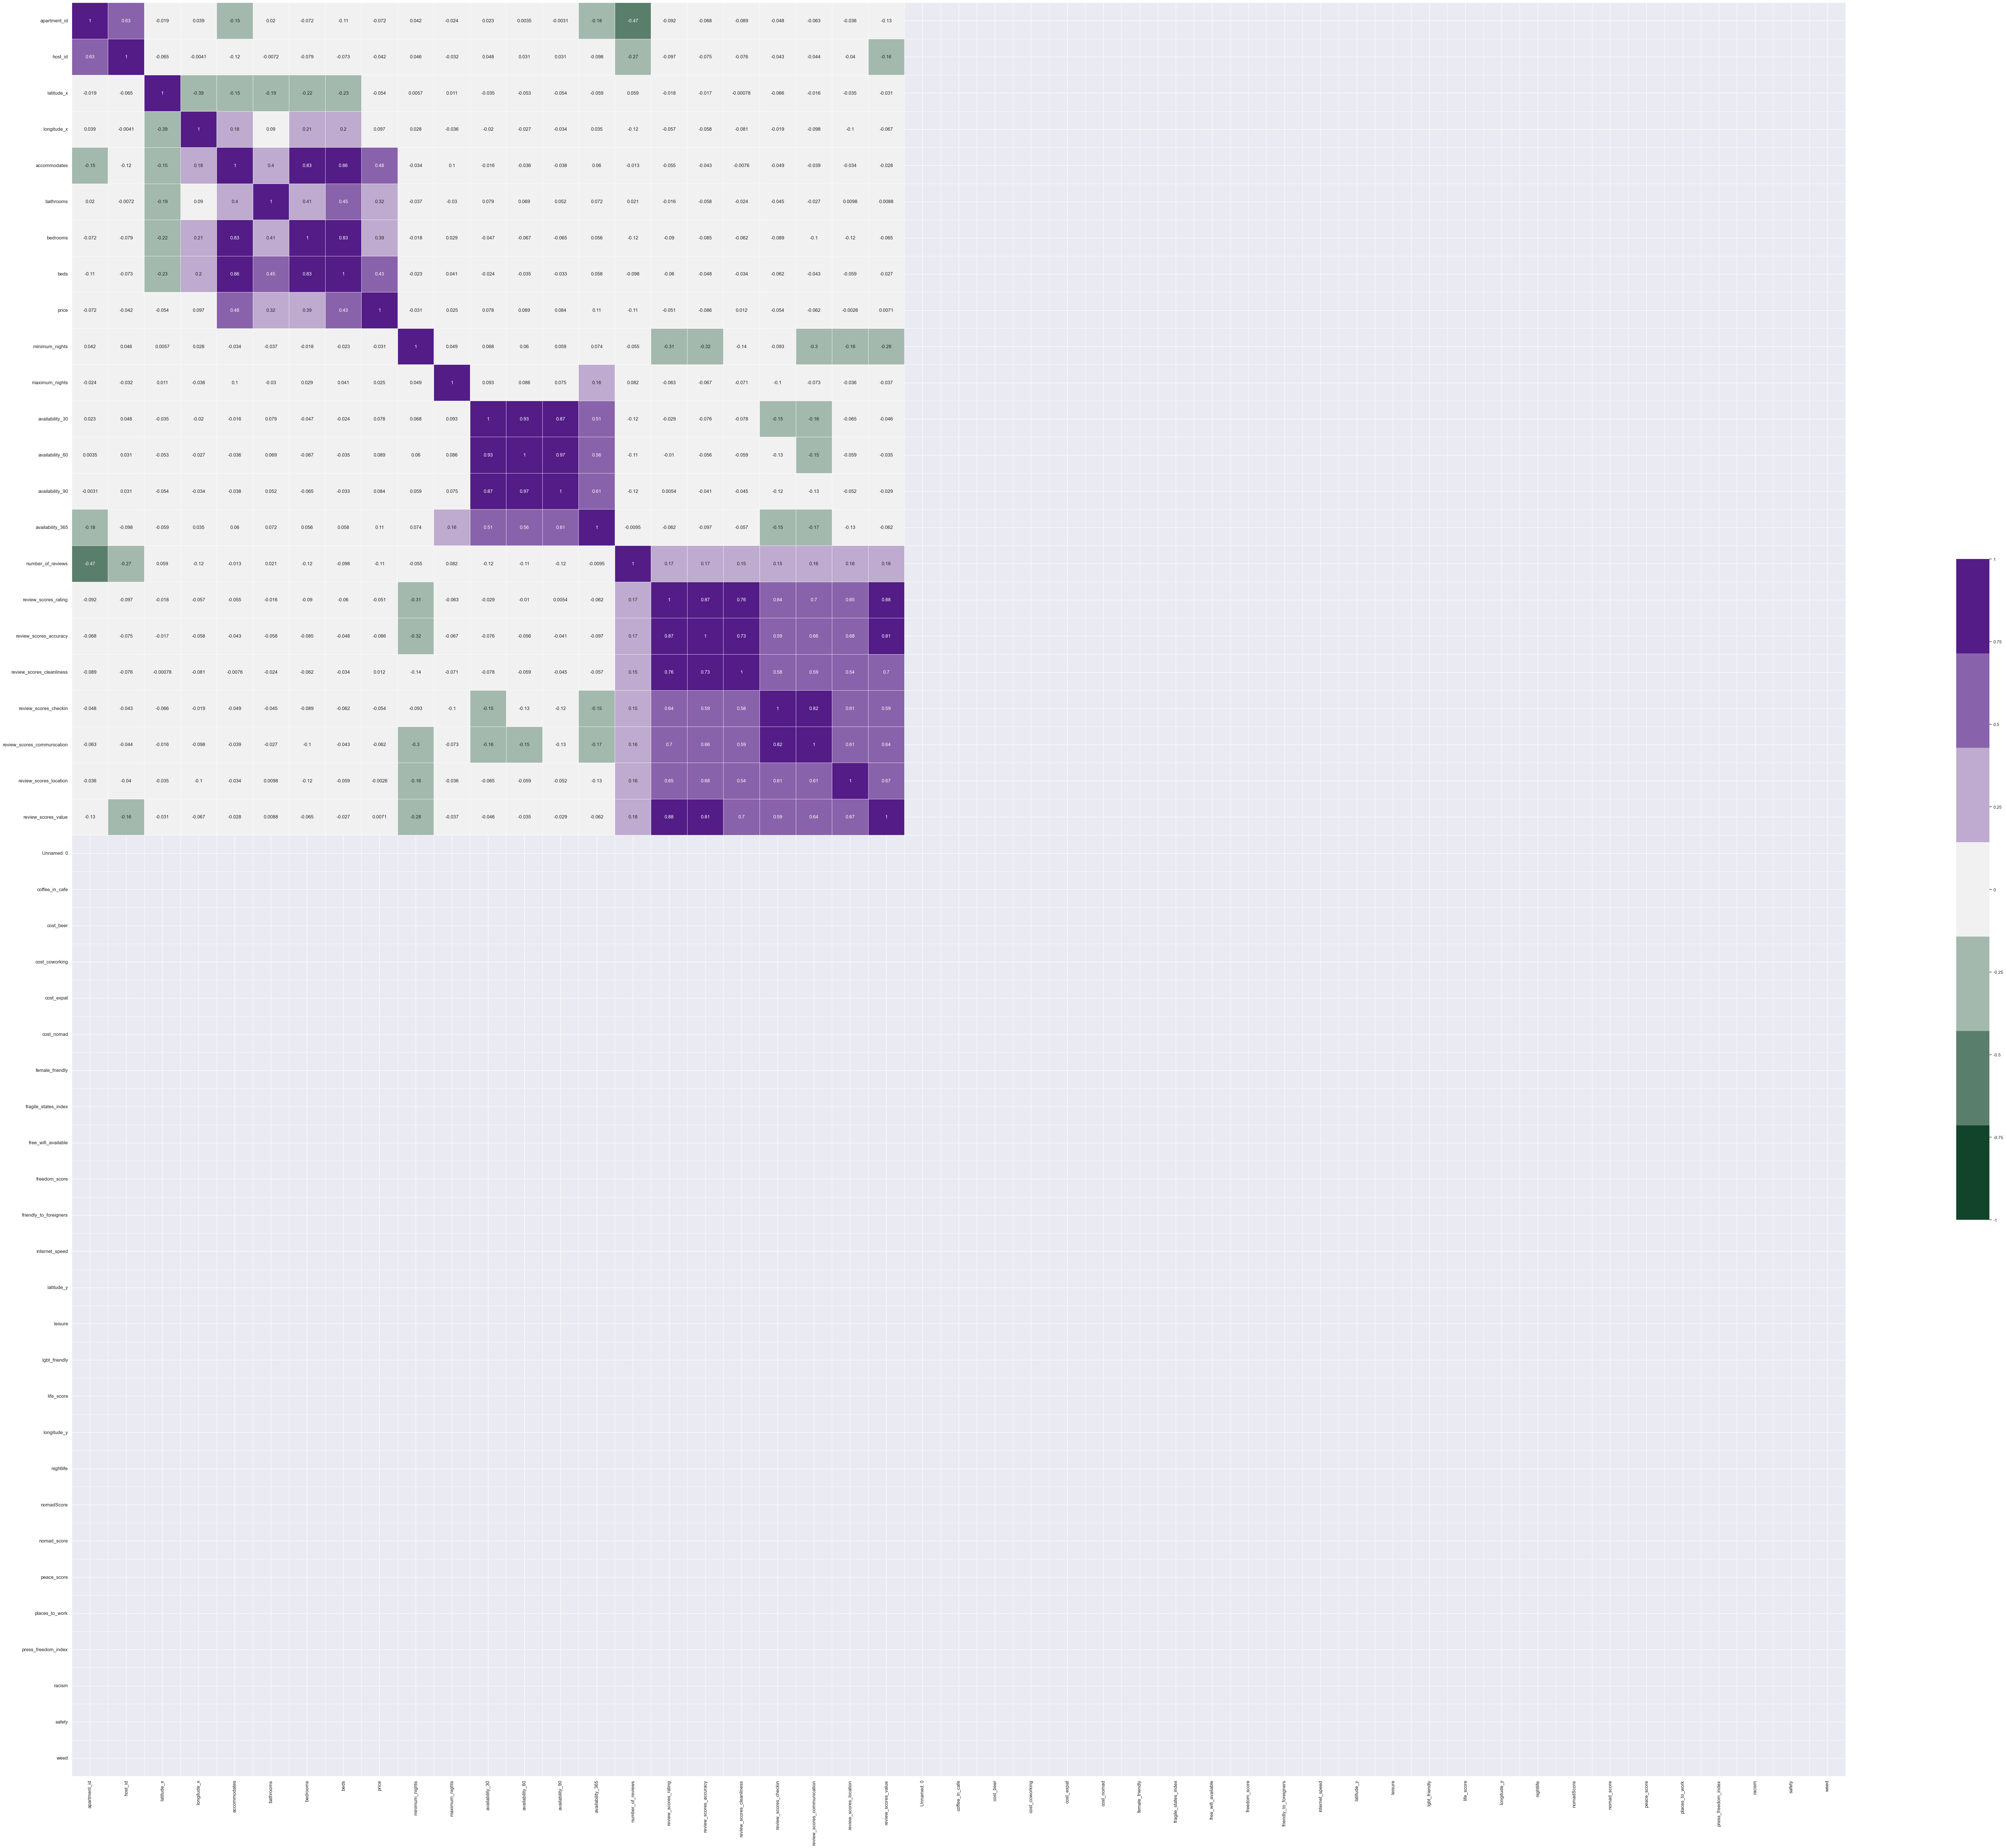

In [106]:
#TABLA COEFICIENTE CORRELACION VALENCIA-------------------->PORQUE  NO ME SALE LA OTRA MITAD DE LA TABLA ?????????????????????????????????????????????????????????????????????***************************************

plt.figure(figsize=(100,100))

heatmap=sns.heatmap(ciu_esp_val.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

#Para generar la matriz de correlacion, no se reconocen los valores fecha que hay en los campos
#['first_review_date' ,'last_review_date','insert_date'] 
# Convertir la columna 'fecha_registro' a tipo de dato datetime -->No contiene informacion relevante se elimina de la tabla 


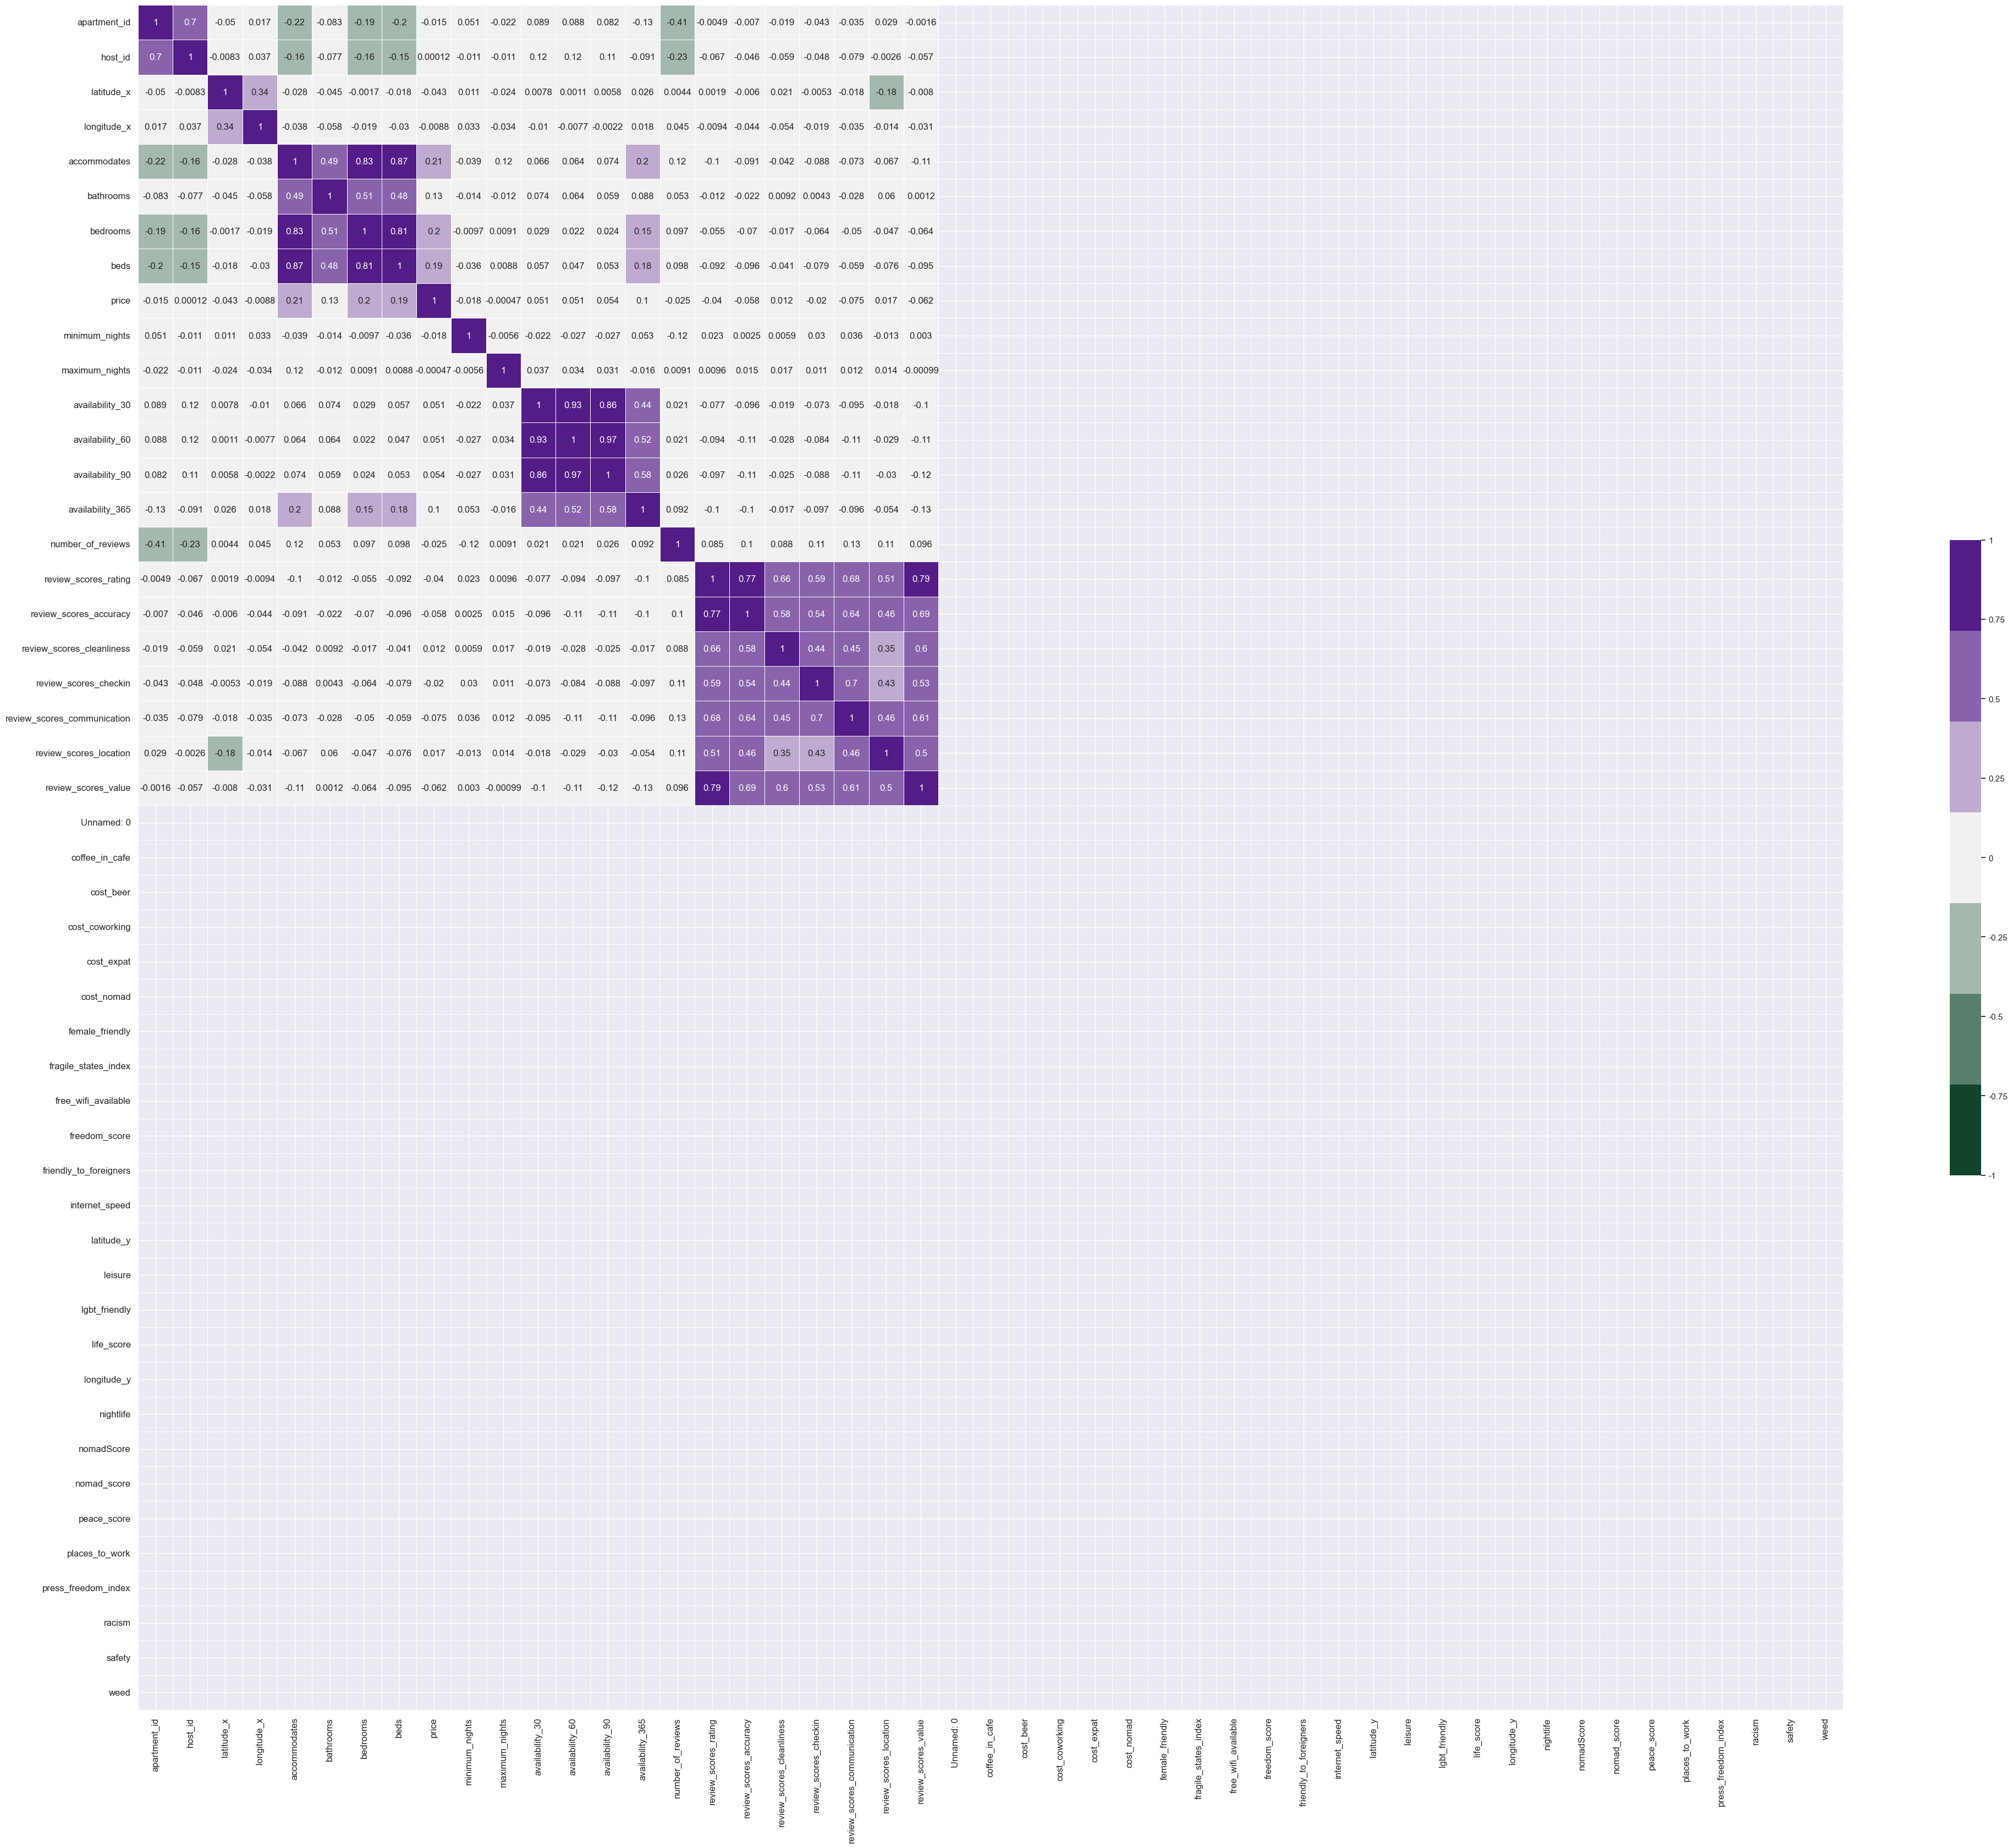

In [76]:
#TABLA COEFICIENTE CORRELACION BARCELONA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_bar.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

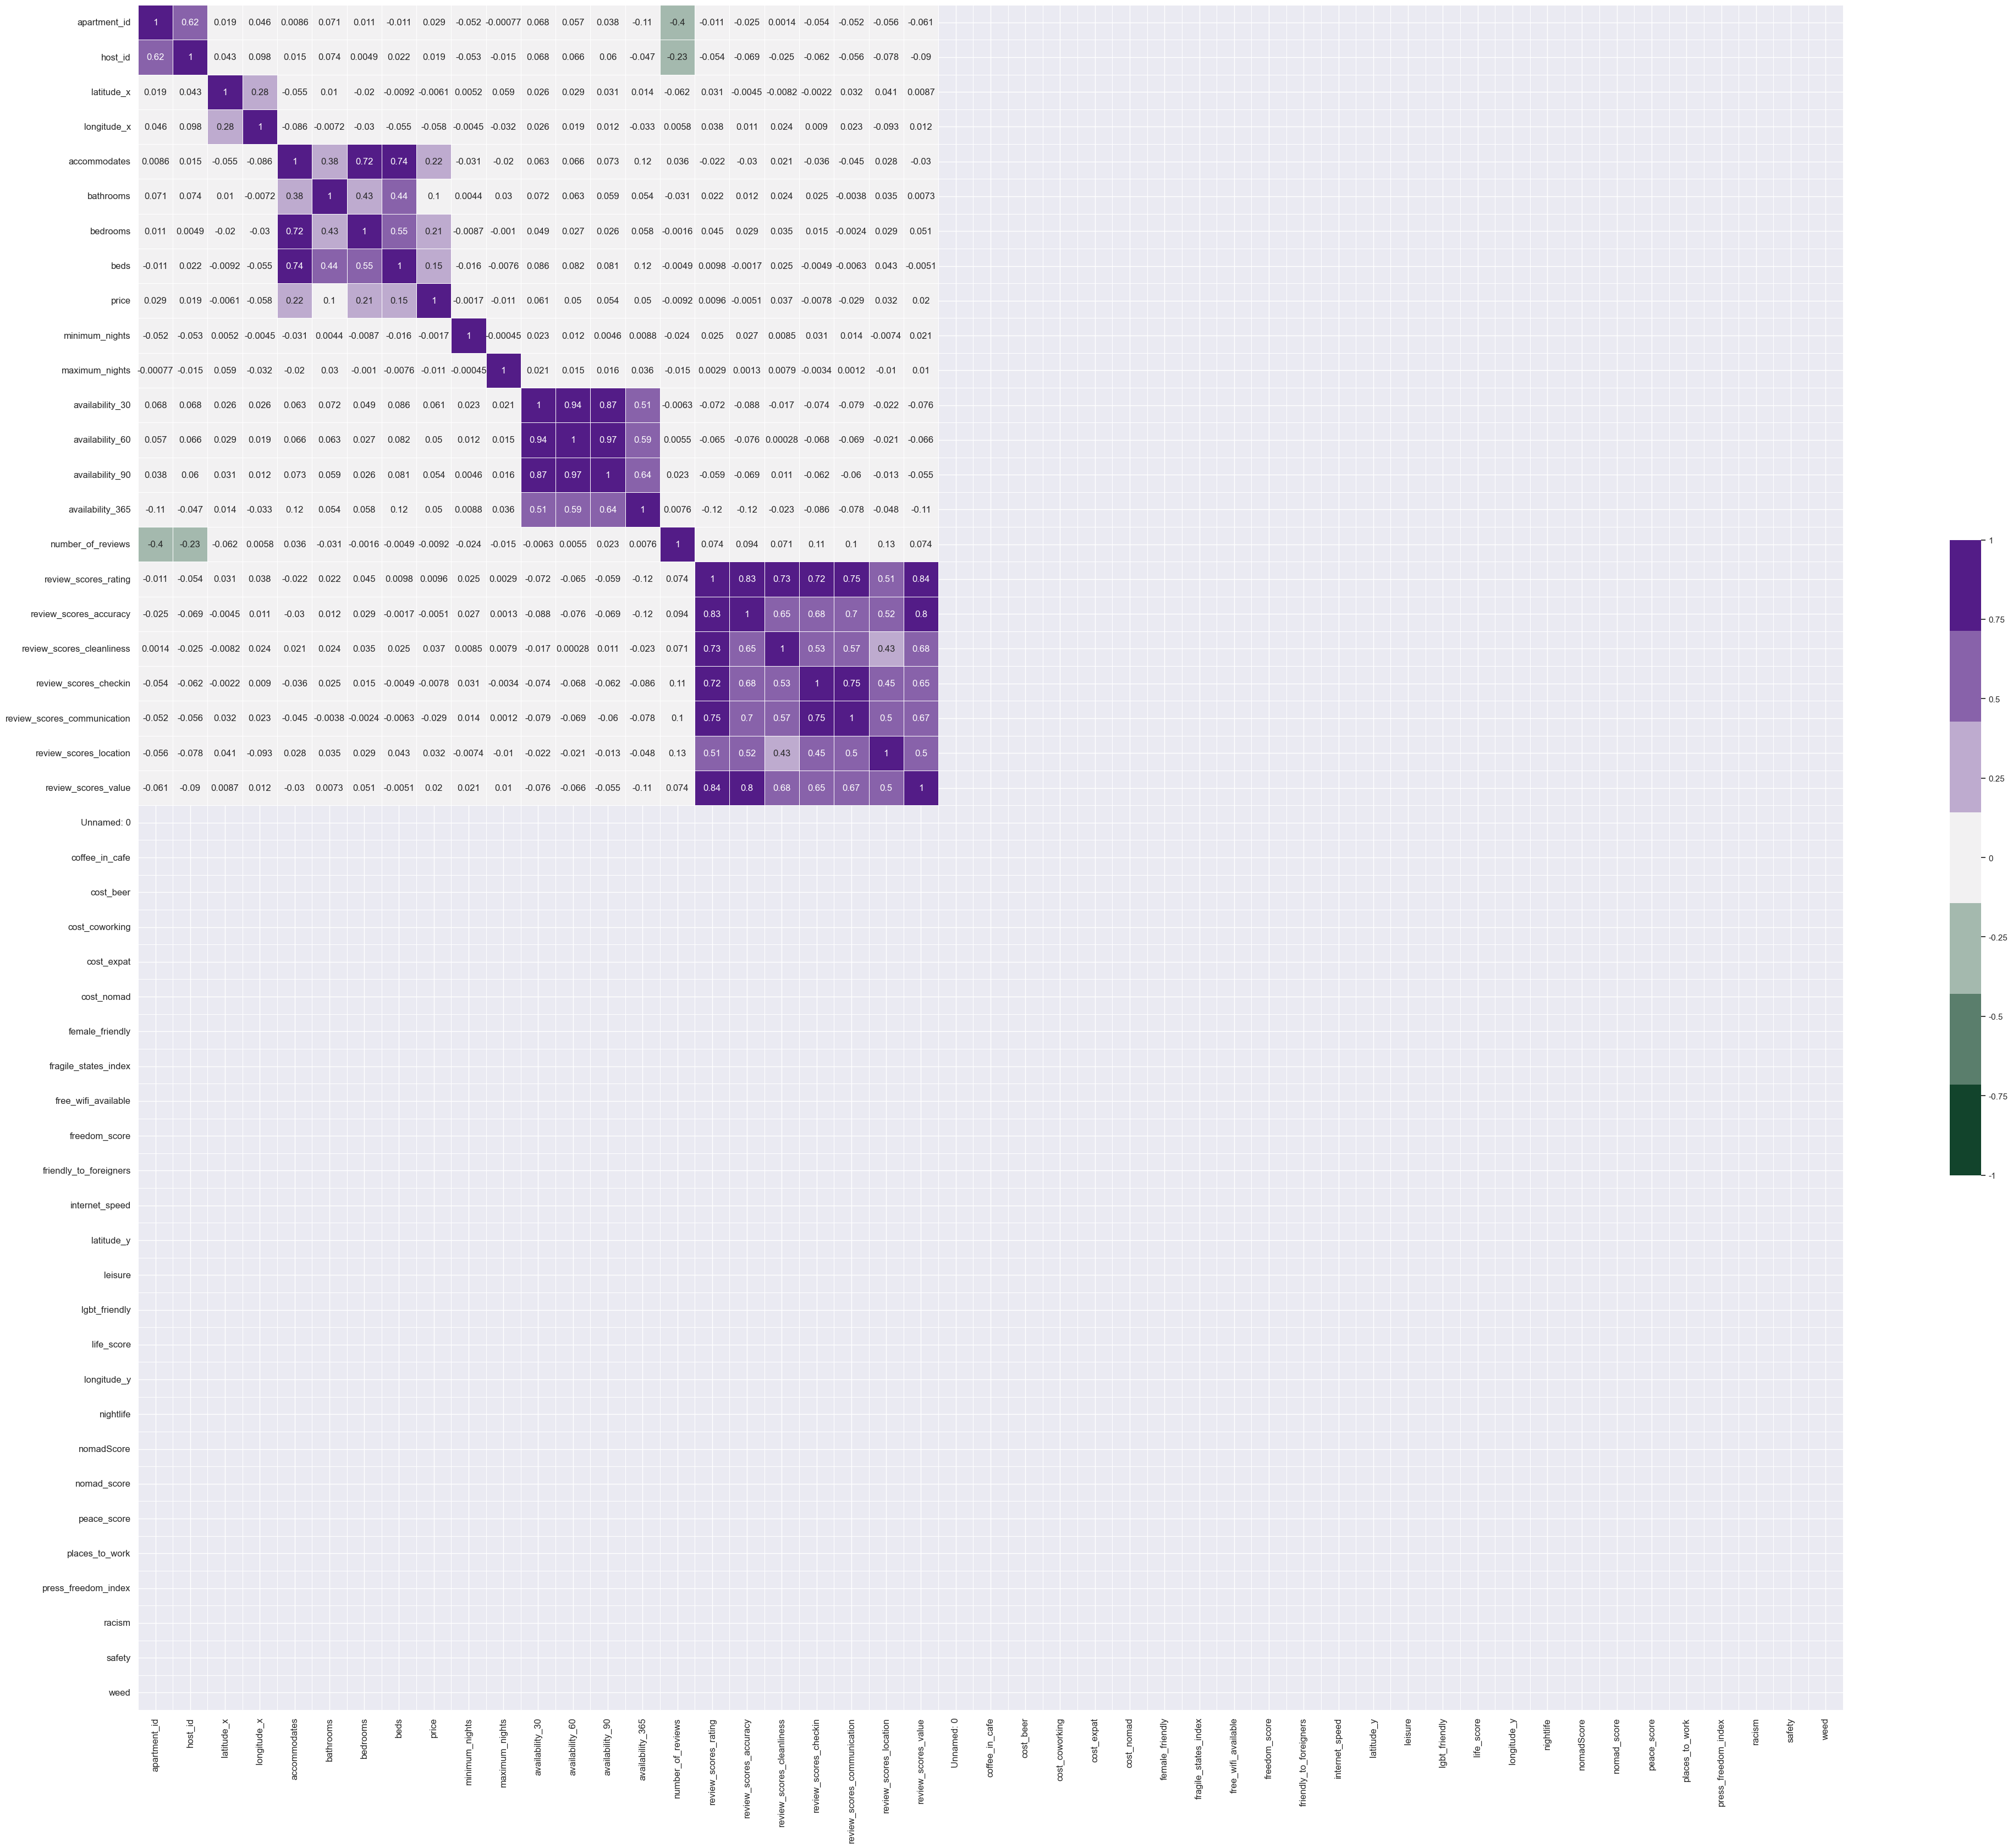

In [77]:
#TABLA COEFICIENTE CORRELACION MADRID 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_mad.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

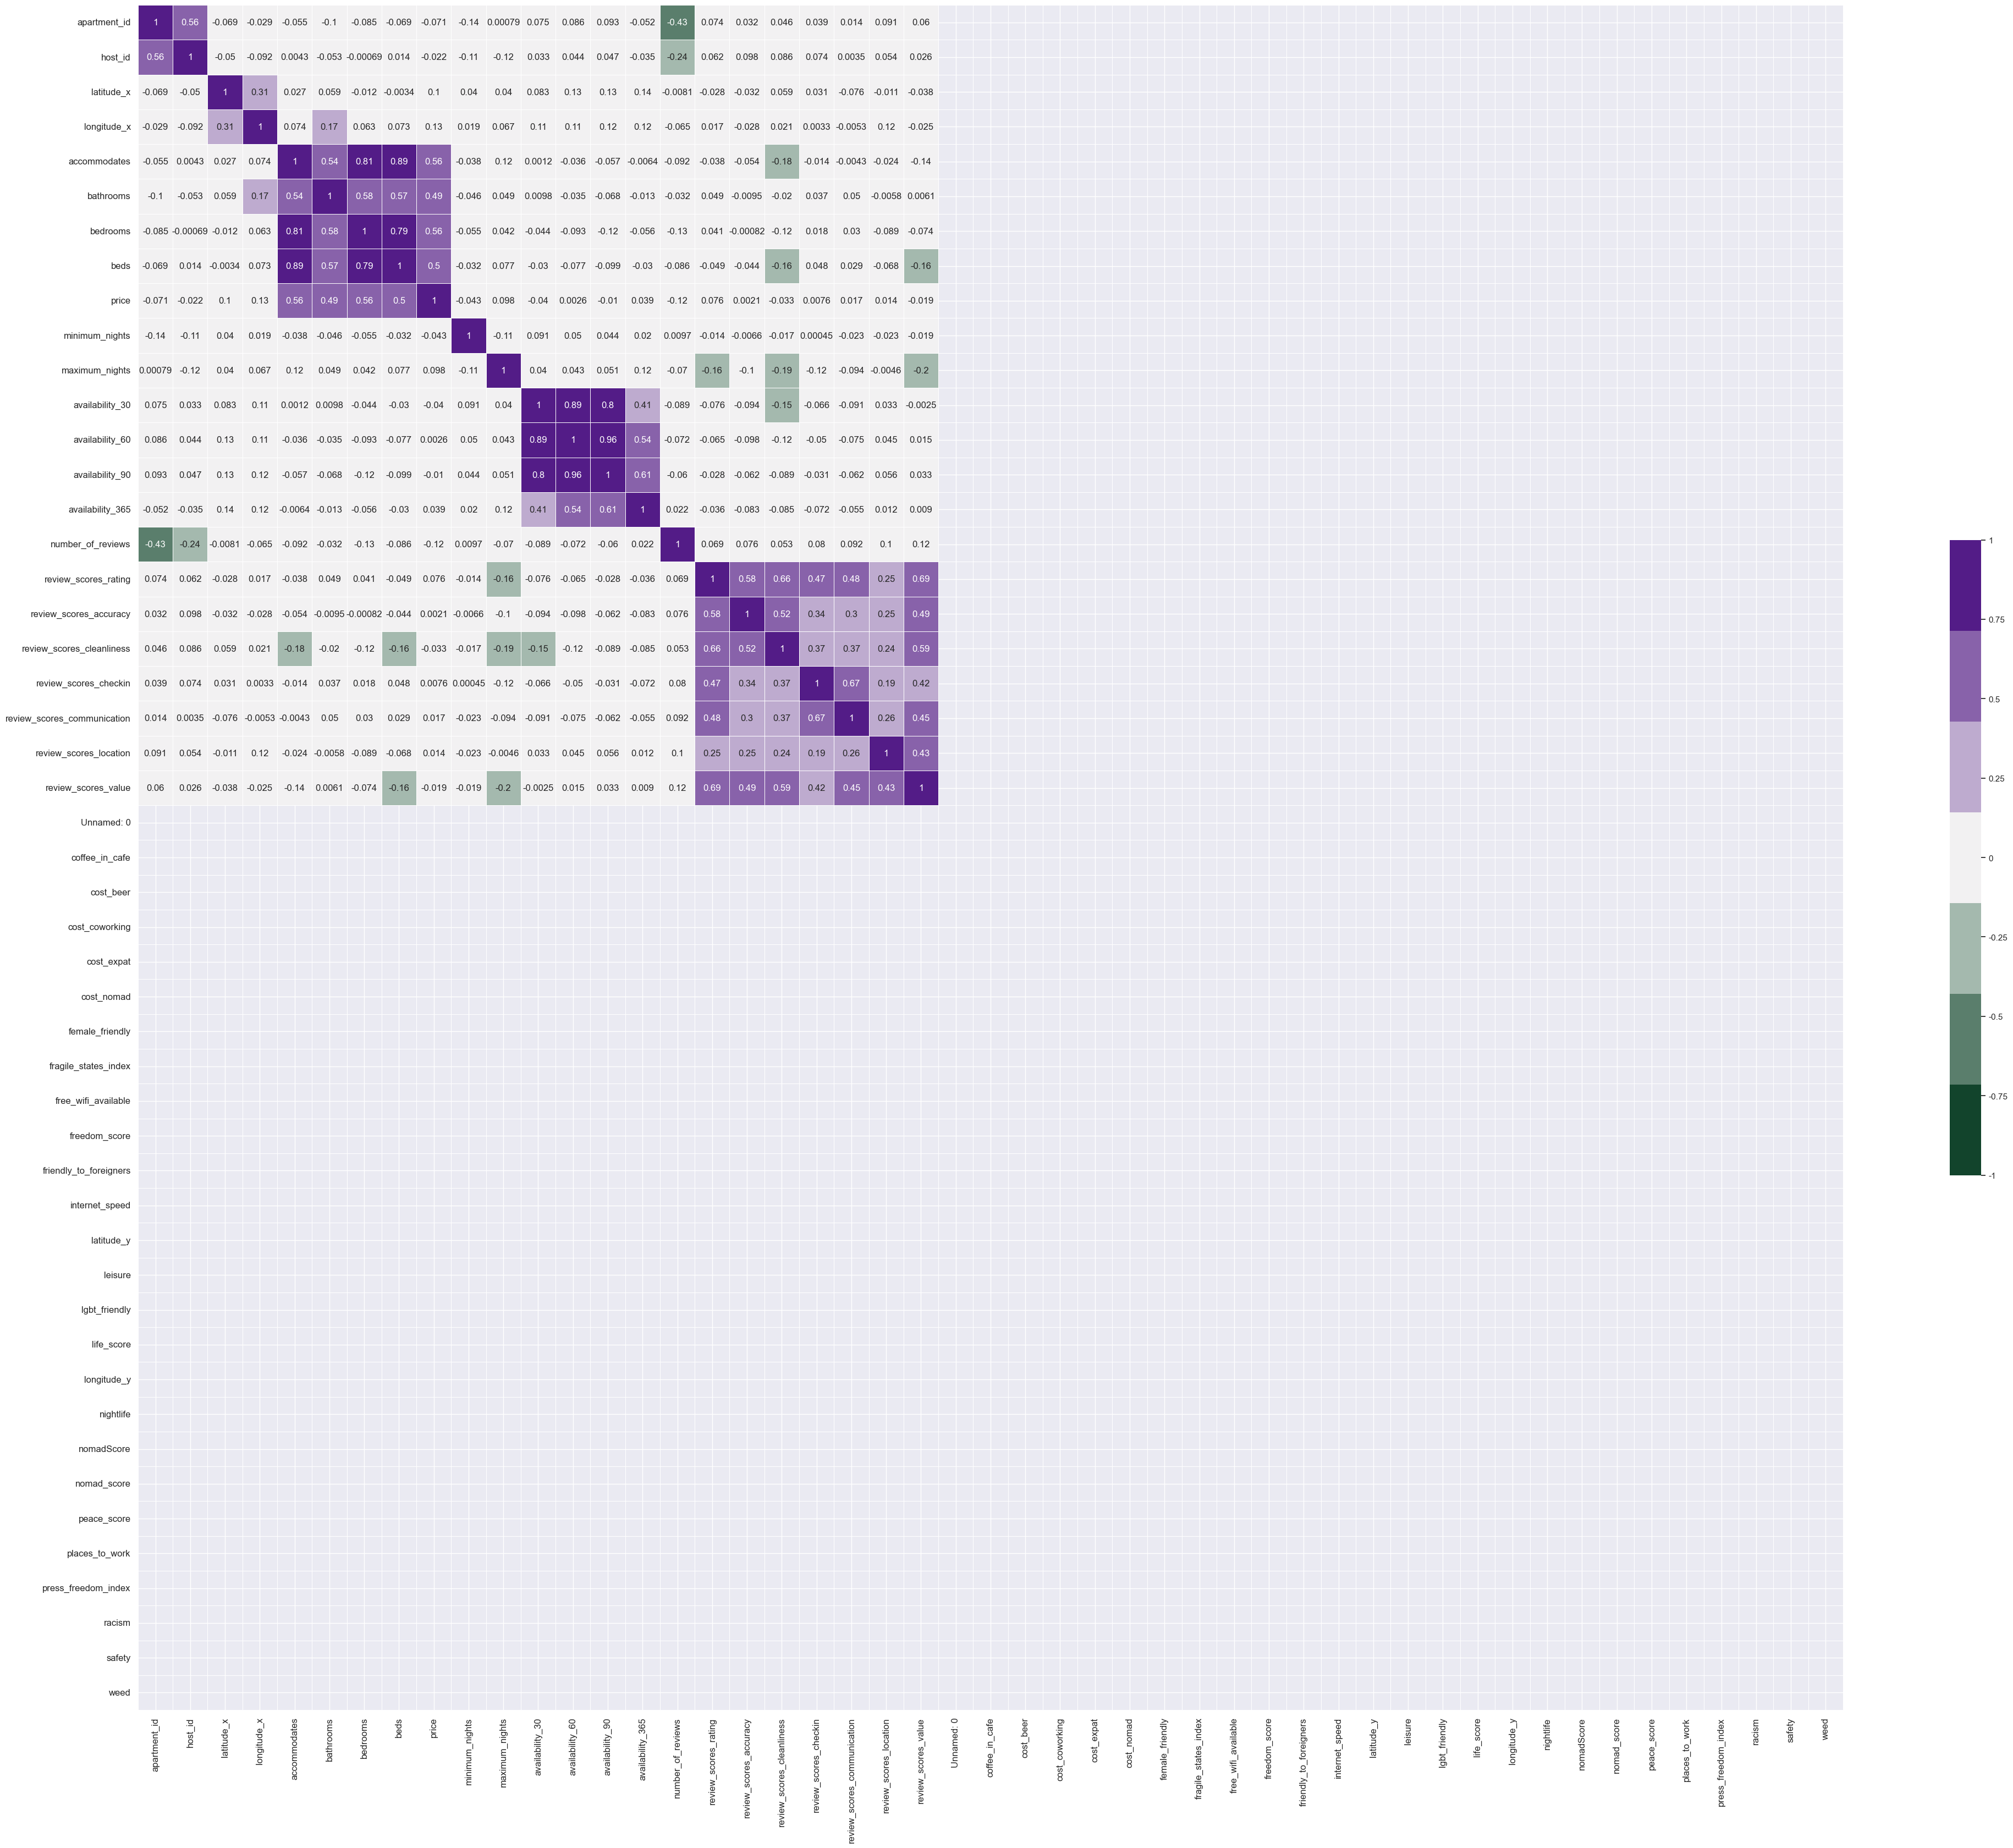

In [78]:
#TABLA COEFICIENTE CORRELACION MALAGA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_mlg.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

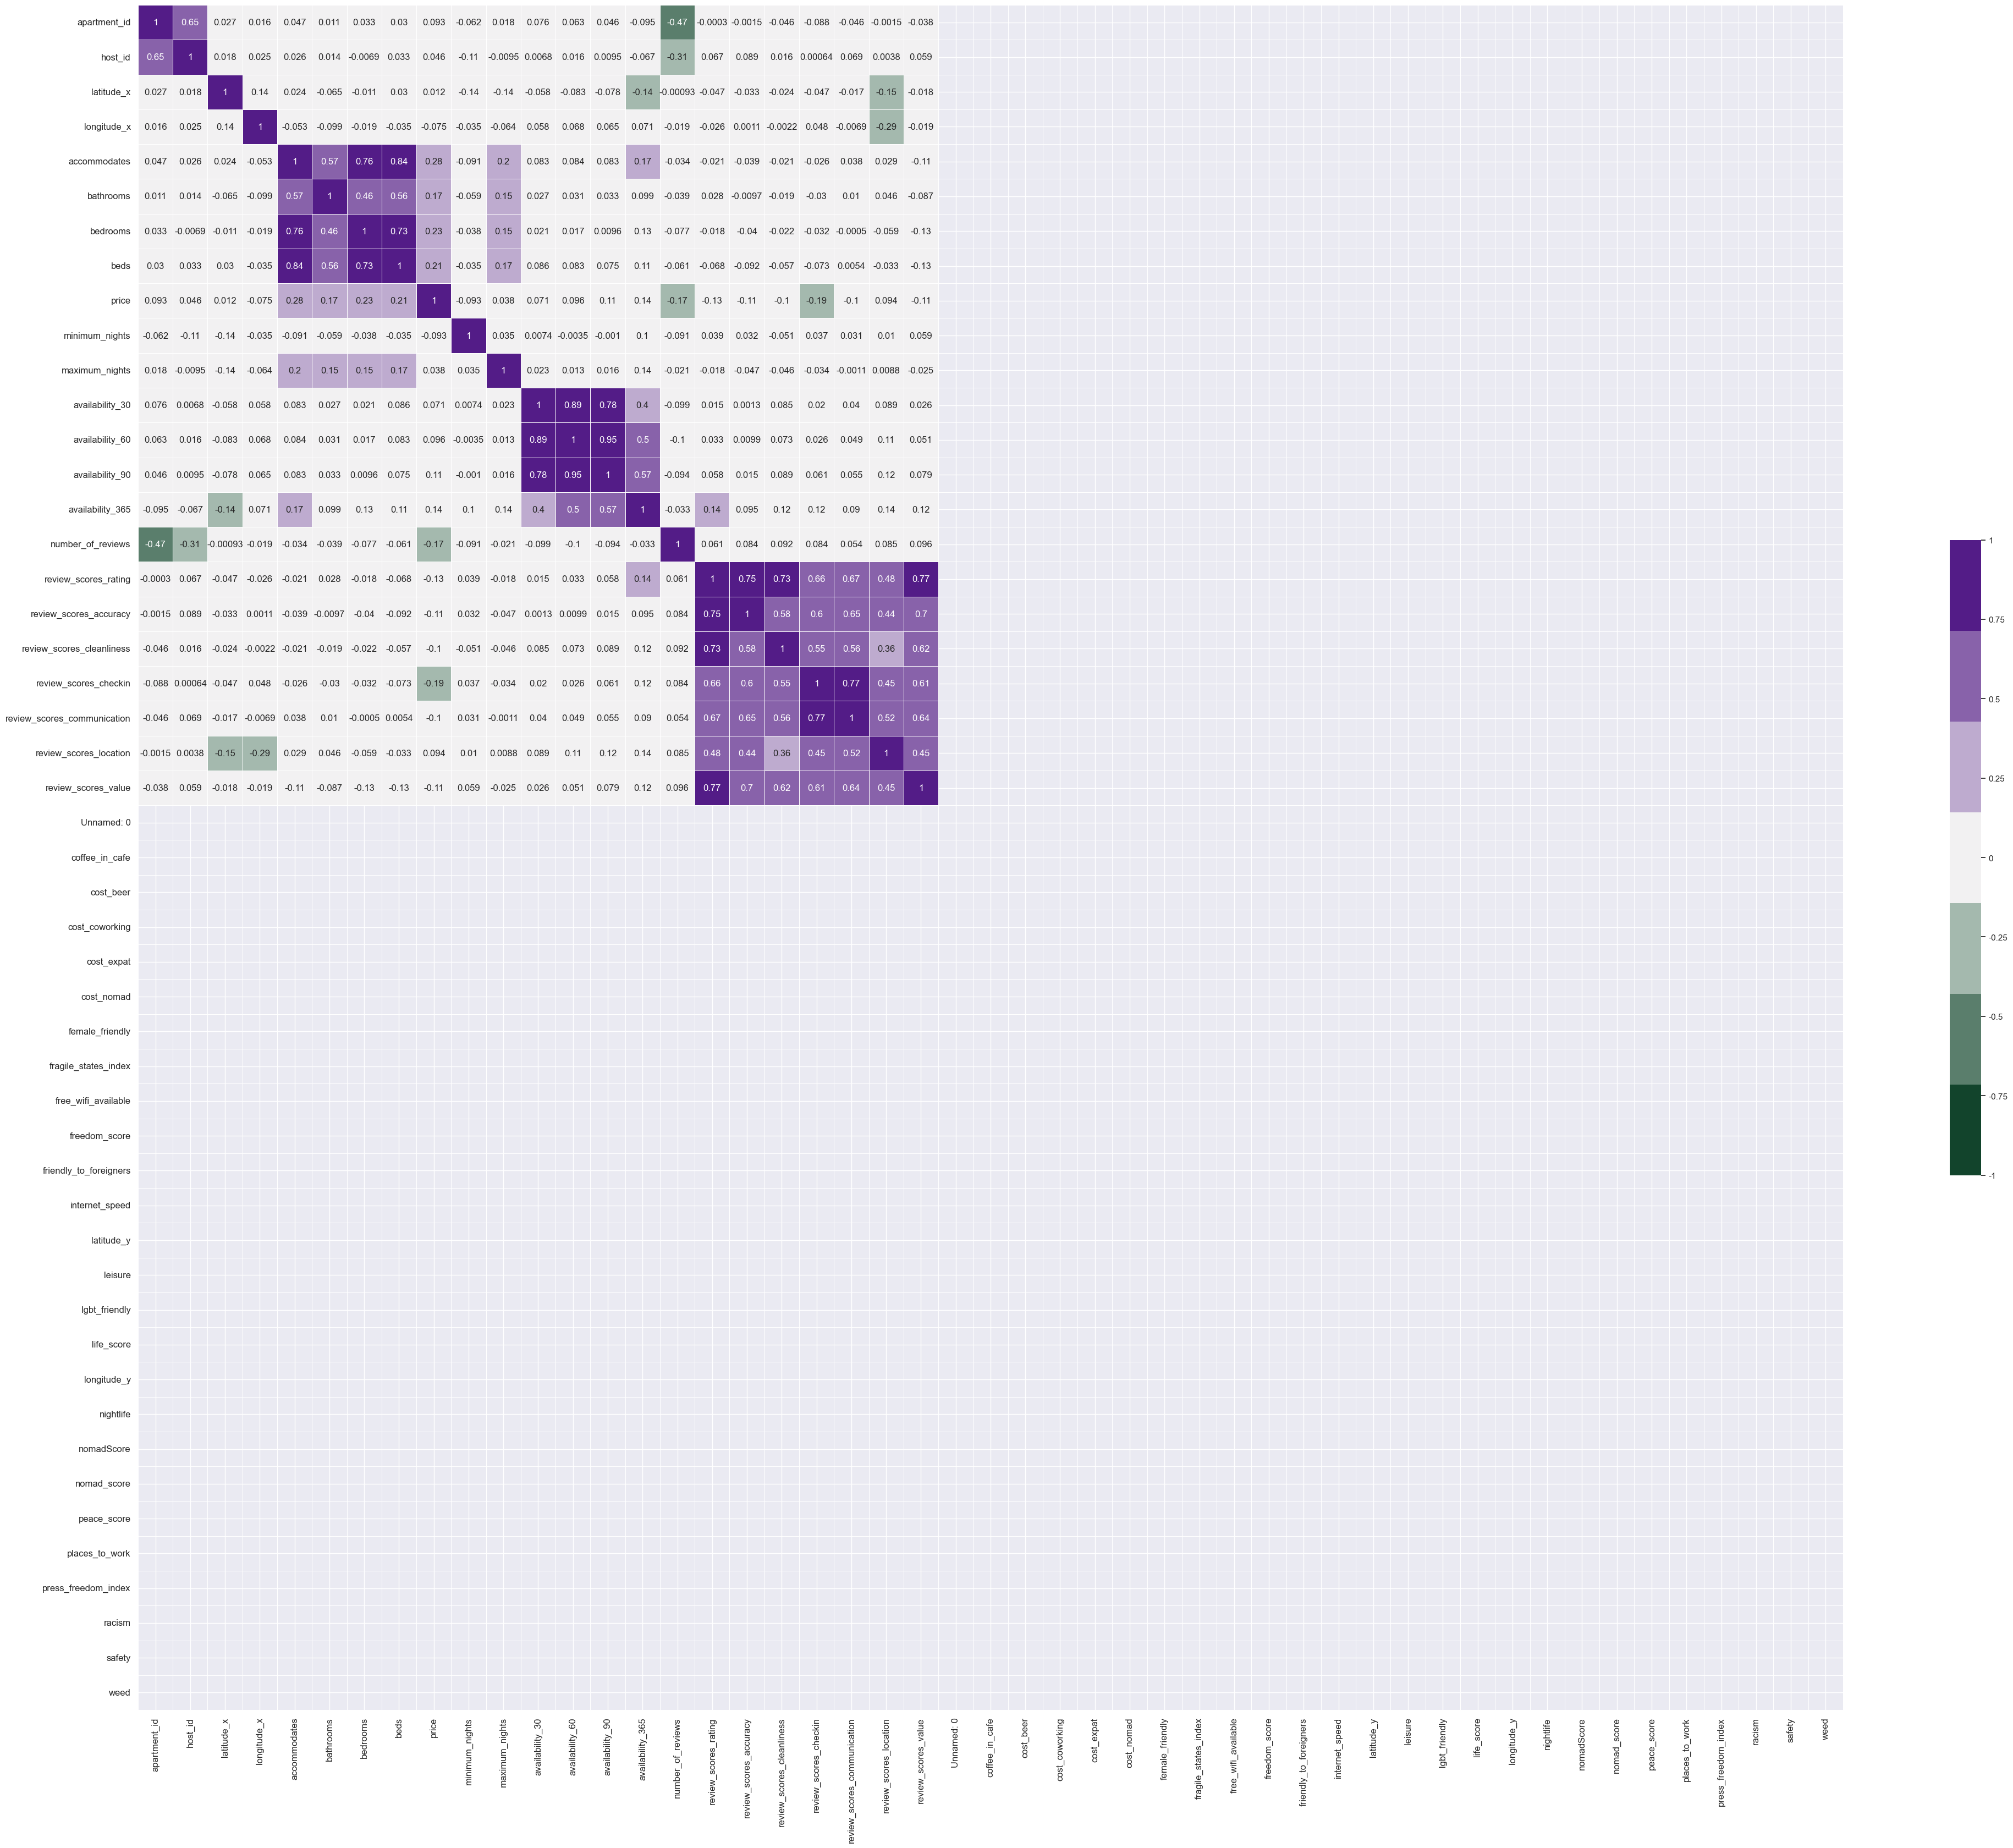

In [79]:
#TABLA COEFICIENTE CORRELACION SEVILLA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_sev.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()